# Clients Churn Exploration

In this part will compare monthly charges of actual and former clients, calculate their statistics and distributions. I.e. draw their portreits!


## Loading and Preprocessing

Load and preprocessing data as almost as in main part







In [ ]:
# load data and libraries
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

PATH = '/content/gdrive/MyDrive/Colab Notebooks/Telecom/final_provider/'
random_state=12345

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
os.chdir(PATH)

In [ ]:
filenames = [i for i in glob.glob("*.csv")]
filenames

['phone.csv', 'personal.csv', 'internet.csv', 'contract.csv']

In [ ]:
data = pd.DataFrame(columns=['customerID'])
for file in filenames:
    frame = pd.read_csv(file)
    frame[file] = file #mark an initial dataset
    data = data.merge(frame, how='outer', on='customerID')

In [ ]:
data.head()

,customerID,MultipleLines,phone.csv,gender,SeniorCitizen,Partner,Dependents,personal.csv,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,internet.csv,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,contract.csv
0,5575-GNVDE,No,phone.csv,Male,0,No,No,personal.csv,DSL,Yes,No,Yes,No,No,No,internet.csv,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,contract.csv
1,3668-QPYBK,No,phone.csv,Male,0,No,No,personal.csv,DSL,Yes,Yes,No,No,No,No,internet.csv,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,contract.csv
2,9237-HQITU,No,phone.csv,Female,0,No,No,personal.csv,Fiber optic,No,No,No,No,No,No,internet.csv,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,contract.csv
3,9305-CDSKC,Yes,phone.csv,Female,0,No,No,personal.csv,Fiber optic,No,No,Yes,No,Yes,Yes,internet.csv,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5,contract.csv
4,1452-KIOVK,Yes,phone.csv,Male,0,No,Yes,personal.csv,Fiber optic,No,Yes,No,No,Yes,No,internet.csv,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,contract.csv


In [ ]:
#check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   MultipleLines     6361 non-null   object 
 2   phone.csv         6361 non-null   object 
 3   gender            7043 non-null   object 
 4   SeniorCitizen     7043 non-null   int64  
 5   Partner           7043 non-null   object 
 6   Dependents        7043 non-null   object 
 7   personal.csv      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  internet.csv      5517 non-null   object 
 16  BeginDate         7043 non-null   object 


In [ ]:
# get dataset headers lower

data.columns = map(str.lower, data.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   multiplelines     6361 non-null   object 
 2   phone.csv         6361 non-null   object 
 3   gender            7043 non-null   object 
 4   seniorcitizen     7043 non-null   int64  
 5   partner           7043 non-null   object 
 6   dependents        7043 non-null   object 
 7   personal.csv      7043 non-null   object 
 8   internetservice   5517 non-null   object 
 9   onlinesecurity    5517 non-null   object 
 10  onlinebackup      5517 non-null   object 
 11  deviceprotection  5517 non-null   object 
 12  techsupport       5517 non-null   object 
 13  streamingtv       5517 non-null   object 
 14  streamingmovies   5517 non-null   object 
 15  internet.csv      5517 non-null   object 
 16  begindate         7043 non-null   object 


In [ ]:
#get target
def get_target(dataset):
  if dataset == 'No':
    target = 0
  else:
    target = 1
  return target 

data['has_left'] = data['enddate'].apply(get_target)
data.head()   

,customerid,multiplelines,phone.csv,gender,seniorcitizen,partner,dependents,personal.csv,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,internet.csv,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,contract.csv,has_left
0,5575-GNVDE,No,phone.csv,Male,0,No,No,personal.csv,DSL,Yes,No,Yes,No,No,No,internet.csv,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,contract.csv,0
1,3668-QPYBK,No,phone.csv,Male,0,No,No,personal.csv,DSL,Yes,Yes,No,No,No,No,internet.csv,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,contract.csv,1
2,9237-HQITU,No,phone.csv,Female,0,No,No,personal.csv,Fiber optic,No,No,No,No,No,No,internet.csv,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,contract.csv,1
3,9305-CDSKC,Yes,phone.csv,Female,0,No,No,personal.csv,Fiber optic,No,No,Yes,No,Yes,Yes,internet.csv,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5,contract.csv,1
4,1452-KIOVK,Yes,phone.csv,Male,0,No,Yes,personal.csv,Fiber optic,No,Yes,No,No,Yes,No,internet.csv,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,contract.csv,0


In [ ]:
data['enddate_today'] = data['enddate'].apply(lambda x: '2020-02-01' if x=='No' else x)
data.head()

,customerid,multiplelines,phone.csv,gender,seniorcitizen,partner,dependents,personal.csv,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,internet.csv,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,contract.csv,has_left,enddate_today
0,5575-GNVDE,No,phone.csv,Male,0,No,No,personal.csv,DSL,Yes,No,Yes,No,No,No,internet.csv,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,contract.csv,0,2020-02-01
1,3668-QPYBK,No,phone.csv,Male,0,No,No,personal.csv,DSL,Yes,Yes,No,No,No,No,internet.csv,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,contract.csv,1,2019-12-01 00:00:00
2,9237-HQITU,No,phone.csv,Female,0,No,No,personal.csv,Fiber optic,No,No,No,No,No,No,internet.csv,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,contract.csv,1,2019-11-01 00:00:00
3,9305-CDSKC,Yes,phone.csv,Female,0,No,No,personal.csv,Fiber optic,No,No,Yes,No,Yes,Yes,internet.csv,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5,contract.csv,1,2019-11-01 00:00:00
4,1452-KIOVK,Yes,phone.csv,Male,0,No,Yes,personal.csv,Fiber optic,No,Yes,No,No,Yes,No,internet.csv,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,contract.csv,0,2020-02-01


In [ ]:
#switch data type to an apropriate one
data['begindate'] = pd.to_datetime(data['begindate'])
data['enddate_today'] = pd.to_datetime(data['enddate_today'])
data['enddate'] = pd.to_datetime(data['enddate'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   multiplelines     6361 non-null   object        
 2   phone.csv         6361 non-null   object        
 3   gender            7043 non-null   object        
 4   seniorcitizen     7043 non-null   int64         
 5   partner           7043 non-null   object        
 6   dependents        7043 non-null   object        
 7   personal.csv      7043 non-null   object        
 8   internetservice   5517 non-null   object        
 9   onlinesecurity    5517 non-null   object        
 10  onlinebackup      5517 non-null   object        
 11  deviceprotection  5517 non-null   object        
 12  techsupport       5517 non-null   object        
 13  streamingtv       5517 non-null   object        
 14  streamingmovies   5517 n

In [ ]:
#calculate client's lifetime
data['lifetime'] = (data['enddate_today'] - data['begindate']) / np.timedelta64(1, 'D')


In [ ]:
data.head()

,customerid,multiplelines,phone.csv,gender,seniorcitizen,partner,dependents,personal.csv,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,internet.csv,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,contract.csv,has_left,enddate_today,lifetime
0,5575-GNVDE,No,phone.csv,Male,0,No,No,personal.csv,DSL,Yes,No,Yes,No,No,No,internet.csv,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.5,contract.csv,0,2020-02-01,1036.0
1,3668-QPYBK,No,phone.csv,Male,0,No,No,personal.csv,DSL,Yes,Yes,No,No,No,No,internet.csv,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,contract.csv,1,2019-12-01,61.0
2,9237-HQITU,No,phone.csv,Female,0,No,No,personal.csv,Fiber optic,No,No,No,No,No,No,internet.csv,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,contract.csv,1,2019-11-01,61.0
3,9305-CDSKC,Yes,phone.csv,Female,0,No,No,personal.csv,Fiber optic,No,No,Yes,No,Yes,Yes,internet.csv,2019-03-01,2019-11-01,Month-to-month,Yes,Electronic check,99.65,820.5,contract.csv,1,2019-11-01,245.0
4,1452-KIOVK,Yes,phone.csv,Male,0,No,Yes,personal.csv,Fiber optic,No,Yes,No,No,Yes,No,internet.csv,2018-04-01,NaT,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,contract.csv,0,2020-02-01,671.0


In [ ]:
# find the bad rows in data['totalcharges'] column
bad_rows = []
for i in range(len(data)):
  try:
    data['totalcharges'].values[i] = float(data['totalcharges'].values[i])
  except:
    bad_rows.append(i)
    print(i)

682
847
982
3024
3482
3976
4731
6033
6106
6413
6484


In [ ]:
#drop bad rows
data = data.drop(list(np.array(bad_rows)), axis=0)

In [ ]:
#switch a datatype to float
data['totalcharges'] = data['totalcharges'].astype('float')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7032 non-null   object        
 1   multiplelines     6352 non-null   object        
 2   phone.csv         6352 non-null   object        
 3   gender            7032 non-null   object        
 4   seniorcitizen     7032 non-null   int64         
 5   partner           7032 non-null   object        
 6   dependents        7032 non-null   object        
 7   personal.csv      7032 non-null   object        
 8   internetservice   5512 non-null   object        
 9   onlinesecurity    5512 non-null   object        
 10  onlinebackup      5512 non-null   object        
 11  deviceprotection  5512 non-null   object        
 12  techsupport       5512 non-null   object        
 13  streamingtv       5512 non-null   object        
 14  streamingmovies   5512 n

In [ ]:
data = data.fillna('No')

## Data Analysis

In [ ]:
actual_clients = data[data['has_left'] == 0]
former_clients = data[data['has_left'] == 1]

In [ ]:
actual_clients.describe()

,seniorcitizen,monthlycharges,totalcharges,has_left,lifetime
count,5163.000000,5163.000000,5163.000000,5163.0,5163.000000
mean,0.128995,61.307408,2555.344141,0.0,1146.885532
std,0.335227,31.094557,2329.456984,0.0,732.773458
min,0.000000,18.250000,18.800000,0.0,31.000000
25%,0.000000,25.100000,577.825000,0.0,457.000000
50%,0.000000,64.450000,1683.600000,0.0,1157.000000
75%,0.000000,88.475000,4264.125000,0.0,1857.000000
max,1.000000,118.750000,8672.450000,0.0,2191.000000


In [ ]:
former_clients.describe()

,seniorcitizen,monthlycharges,totalcharges,has_left,lifetime
count,1869.000000,1869.000000,1869.000000,1869.0,1869.000000
mean,0.254682,74.441332,1531.796094,1.0,547.352060
std,0.435799,24.666053,1890.822994,0.0,594.389607
min,0.000000,18.850000,18.850000,1.0,30.000000
25%,0.000000,56.150000,134.500000,1.0,61.000000
50%,0.000000,79.650000,703.550000,1.0,304.000000
75%,1.000000,94.200000,2331.300000,1.0,883.000000
max,1.000000,118.350000,8684.800000,1.0,2191.000000


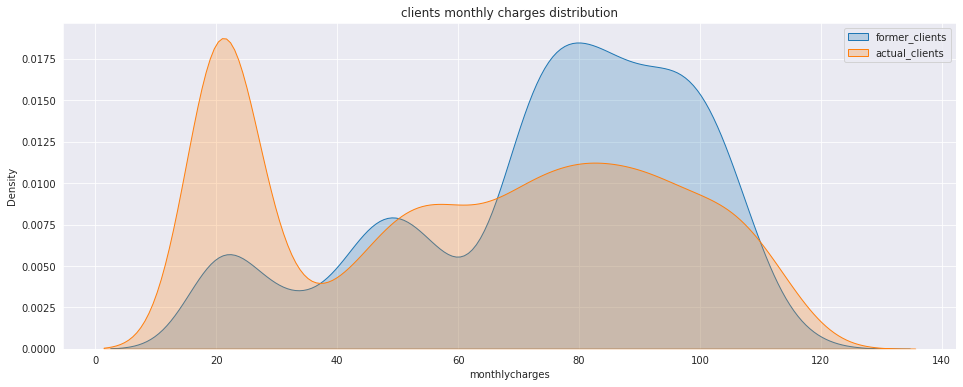

In [ ]:
# MonthlyCharges distribution
plt.figure(figsize=(16,6))
sns.set_style("darkgrid")
ax=sns.kdeplot(data=former_clients['monthlycharges'], label="former_clients", shade=True)
sns.kdeplot(data=actual_clients['monthlycharges'], label="actual_clients", shade=True, ax=ax)
plt.title('clients monthly charges distribution')
plt.legend()

Monthly charges of former clients is bigger than of actual clients. Let's look at internet users and telephone users shares.


In [ ]:
#plot function
def plot_probability(data, labels, title):
  colors = sns.color_palette('pastel')[0:5]
  plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
  plt.title(title)
  plt.show()



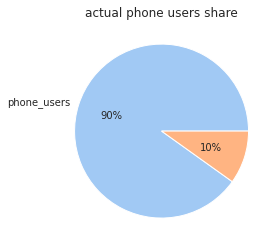

In [ ]:
#actual phone users share
plot_probability(data=[len(actual_clients[actual_clients['phone.csv'] != 'No']), len(actual_clients) - len(actual_clients[actual_clients['phone.csv'] != 'No'])],
                 labels=['phone_users', ''],
                 title='actual phone users share')

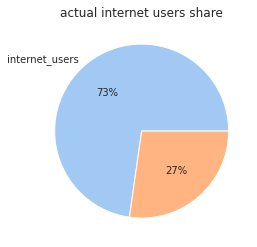

In [ ]:
#actual internet users share
plot_probability(data=[len(actual_clients[actual_clients['internet.csv'] != 'No']), len(actual_clients) - len(actual_clients[actual_clients['internet.csv'] != 'No'])],
                 labels=['internet_users', ''],
                 title='actual internet users share')

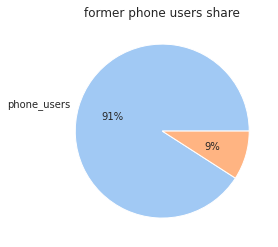

In [ ]:
#former phone users share
plot_probability(data=[len(former_clients[former_clients['phone.csv'] != 'No']), len(former_clients) - len(former_clients[former_clients['phone.csv'] != 'No'])],
                 labels=['phone_users', ''],
                 title='former phone users share')

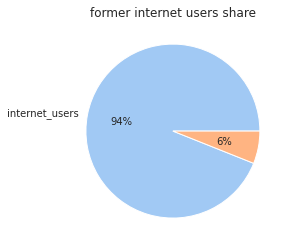

In [ ]:
#former internet users share
plot_probability(data=[len(former_clients[former_clients['internet.csv'] != 'No']), len(former_clients) - len(former_clients[former_clients['internet.csv'] != 'No'])],
                 labels=['internet_users', ''],
                 title='former internet users share')

Share of internet users among former clients is bigger than among actual clients. Let's calculate probability of phone users became internet users and contrariwise


In [ ]:
actual_phone_users = len(actual_clients[actual_clients['phone.csv'] != 'No'])
actual_phone_users

4653

In [ ]:
actual_internet_users = len(actual_clients[actual_clients['internet.csv'] != 'No'])
actual_internet_users

3756

In [ ]:
all_actual_users = len(actual_clients)
all_actual_users

5163

In [ ]:
#calculate probability of phone users became internet users
int_only = 1 - actual_phone_users/len(actual_clients)
int_only

0.09877977919814063

In [ ]:
#intersection of internet and phone users
int_and_ph = actual_internet_users / all_actual_users - int_only
int_and_ph

0.6287042417199302

In [ ]:
#probability of phone users became internet users
int_ph_act = int_and_ph/(actual_phone_users/all_actual_users)
int_ph_act

0.6976144422952933

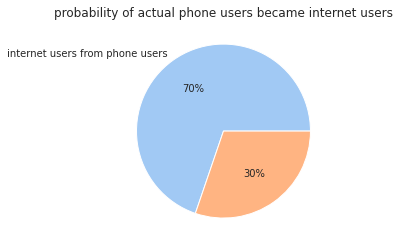

In [ ]:
plot_probability(data=[int_ph_act, 1-int_ph_act],
                 labels=['internet users from phone users', ''],
                 title='probability of actual phone users became internet users')

In [ ]:
#probability of internet users became phone users
ph_int_act = int_ph_act * actual_phone_users / actual_internet_users
ph_int_act

0.8642172523961661

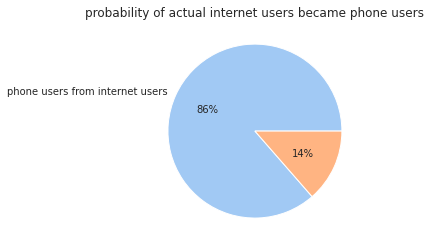

In [ ]:
plot_probability(data=[ph_int_act, 1-ph_int_act],
                 labels=['phone users from internet users', ''],
                 title='probability of actual internet users became phone users')

In [ ]:
#the same for former clients
former_phone_users = len(former_clients[former_clients['phone.csv'] != 'No'])
former_phone_users

1699

In [ ]:
former_internet_users = len(former_clients[former_clients['internet.csv'] != 'No'])
former_internet_users

1756

In [ ]:
all_former_users = len(former_clients)
all_former_users

1869

In [ ]:
#calculate probability of phone users became internet users
int_only = 1 - former_phone_users/all_former_users
int_only

0.09095773140716956

In [ ]:
#intersection of internet and phone users
int_and_ph = former_internet_users / all_former_users - int_only
int_and_ph

0.848582129481006

In [ ]:
#probability of phone users became internet users
int_ph_form = int_and_ph/(former_phone_users/all_former_users)
int_ph_form

0.9334902884049441

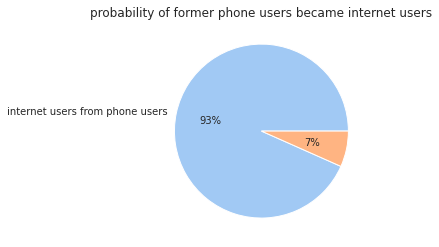

In [ ]:
plot_probability(data=[int_ph_form, 1-int_ph_form],
                 labels=['internet users from phone users', ''],
                 title='probability of former phone users became internet users')

In [ ]:
#probability of internet users became phone users
ph_int_form = int_ph_form * former_phone_users / former_internet_users
ph_int_form

0.9031890660592256

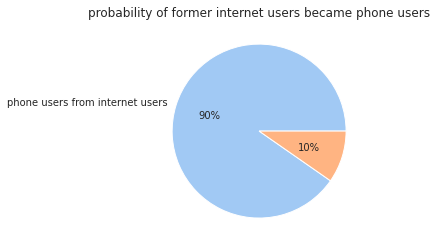

In [ ]:
plot_probability(data=[ph_int_form, 1-ph_int_form],
                 labels=['phone users from internet users', ''],
                 title='probability of former internet users became phone users')

Among actual clients probability of phone users became internet users is lesser than contrariwise. But among former clients that values are almost equal. 

## Conclusion

Summarizing this exploration we can say that users leaves company after their monthly charges significantly increases. Before that customers tries telephone and internet services either. Apparantly they looking for better service ;)